In [1]:
#import stuff
import xlrd
book = xlrd.open_workbook('JoyNLP_TestSet.xlsx')
sheet = book.sheet_by_index(0)
sheet.row_values(0,end_colx=7,start_colx=0)

['pubmed_id',
 'title',
 'abstract_text',
 'penetrance',
 'incidence',
 'Germline',
 'Somatic']

In [2]:
import numpy as np

In [3]:
import nltk
#nltk.download_shell()

In [4]:
#slice out vlaues needed, they are still cells and not strings
title = sheet.col_slice(colx=1,end_rowx=5335,start_rowx=1)
abstract = sheet.col_slice(colx=2,end_rowx=5335,start_rowx=1)
penetrance = sheet.col_slice(colx=3,end_rowx=5335,start_rowx=1)
incidence = sheet.col_slice(colx=4,end_rowx=5335,start_rowx=1)
germline = sheet.col_slice(colx=5,end_rowx=5335,start_rowx=1)
somatic = sheet.col_slice(colx=6,end_rowx=5335,start_rowx=1)
len(title)

5333

In [5]:
#convert  to their respective values
for n in np.arange(len(title)):
    title[n] = title[n].value
    abstract[n] = abstract[n].value
    penetrance[n] = penetrance[n].value
    incidence[n] = incidence[n].value
    germline[n] = germline[n].value
    somatic[n] = somatic[n].value

In [6]:
for n in np.arange(len(title)):
    title[n]=title[n]+' '+abstract[n]

In [8]:
#creating a dataframe of the data in excel but realised later that it is useless
import pandas as pd
raw_data = {'title+ab':title,'penetrance':penetrance,'incidence':incidence,'germline':germline,'somatic':somatic}
df = pd.DataFrame(raw_data,columns=['title+ab','penetrance','incidence','germline','somatic'])
df.to_csv('JoyNLP_TestSet_small')

In [115]:
#mess = pd.read_csv('JoyNLP_TestSet_small')

In [116]:
#mess.head()

In [71]:
##############PRE-PROC###################
#initial pre processing experimentation, so it isn't clean and many random cells with just some small purpose

In [7]:
from nltk.corpus import stopwords

In [8]:
import string
#remove punctuations and stopwords run separately run1
for n in np.arange(len(title)):
    title[n] = [c for c in title[n] if c not in string.punctuation]
    

In [9]:
title[1]

['G',
 'e',
 'n',
 'e',
 't',
 'i',
 'c',
 ' ',
 's',
 'u',
 's',
 'c',
 'e',
 'p',
 't',
 'i',
 'b',
 'i',
 'l',
 'i',
 't',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'r',
 'e',
 'a',
 's',
 't',
 ' ',
 'c',
 'a',
 'n',
 'c',
 'e',
 'r',
 ' ',
 'D',
 'e',
 'l',
 'e',
 't',
 'e',
 'r',
 'i',
 'o',
 'u',
 's',
 ' ',
 'm',
 'u',
 't',
 'a',
 't',
 'i',
 'o',
 'n',
 's',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'w',
 'o',
 ' ',
 'b',
 'r',
 'e',
 'a',
 's',
 't',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'o',
 'v',
 'a',
 'r',
 'i',
 'a',
 'n',
 ' ',
 'c',
 'a',
 'n',
 'c',
 'e',
 'r',
 ' ',
 's',
 'u',
 's',
 'c',
 'e',
 'p',
 't',
 'i',
 'b',
 'i',
 'l',
 'i',
 't',
 'y',
 ' ',
 'g',
 'e',
 'n',
 'e',
 's',
 ' ',
 'B',
 'R',
 'C',
 'A',
 '1',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'B',
 'R',
 'C',
 'A',
 '2',
 ' ',
 'h',
 'a',
 'v',
 'e',
 ' ',
 'b',
 'e',
 'e',
 'n',
 ' ',
 'i',
 'd',
 'e',
 'n',
 't',
 'i',
 'f',
 'i',
 'e',
 'd',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'r',
 'e',
 'a',
 's',
 't',
 ' ',
 'a',
 'n',
 'd',
 ' '

In [10]:
#run
for n in np.arange(len(title)):
    title[n] = ''.join(title[n])

In [12]:
title[1].lower()

'genetic susceptibility to breast cancer deleterious mutations in two breast and ovarian cancer susceptibility genes brca1 and brca2 have been identified in breast and ovarian cancer families women with a brca1 or brca2 mutation are candidates for additional risk reduction measures such as intensive screening prophylactic surgery or chemoprevention additional susceptibility genes have been identified including pten atm tp53 chek2 casp8 pbrl and brip1 yet many women with a personal or family history suggestive of a hereditary susceptibility to breast cancer undergo genetic testing and no significant genetic alteration is found thus there are other susceptibility genes that have not been identified and it is likely that the remaining familial contribution to breast cancer will be explained by the presence of multiple low penetrance alleles that coexist to confer high penetrance risks a polygenic model the american cancer society has identified cancer prevention as a key component of canc

In [98]:
#for n in np.arange(len(title)):
#    clean_title[n]= [word for word in title[n].split() if word.lower() not in stopwords.words('english')]

In [120]:
#title[1]

In [68]:
#function for preproc, does not include any of the experiments in mentioned in the readme, because did not use them initially
def text_proc(mess):
    nopunc = [c for c in mess if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [122]:
#mess['title+ab'].head(len(title)).apply(text_proc)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
bow_tr = CountVectorizer(analyzer=text_proc).fit(title)
len(bow_tr.vocabulary_)

38889

In [18]:
mess_bow = bow_tr.transform(title);

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

In [19]:
tfidf_tr = TfidfTransformer().fit(mess_bow)

In [20]:
mess_tfidf = tfidf_tr.transform(mess_bow)

In [92]:
##############NAIVE BAYES################# 
# Initial works included to test out the effectiveness of each classifier hence each of them is declared independently
# Whereas in the more recent implementation I have made a more modular code where just replacing stuff works out fine

In [15]:
from sklearn.naive_bayes import GaussianNB

In [17]:
penetrance_mod = GaussianlNB().fit(mess_tfidf,penetrance)
#incidence_mod = MultinomialNB().fit(mess_tfidf,incidence)
#germline_mod = MultinomialNB().fit(mess_tfidf,germline)
#somatic_mod = MultinomialNB().fit(mess_tfidf,somatic)

In [18]:
penetrance_pred = penetrance_mod.predict(mess_tfidf)
#incidence_pred = incidence_mod.predict(mess_tfidf)
#germline_pred = germline_mod.predict(mess_tfidf)
#somatic_pred = somatic_mod.predict(mess_tfidf)

In [44]:
len(germline_pred)

5000

In [49]:
lossg = germline-germline_pred
np.absolute(lossg.sum())

857.0

In [50]:
lossp = penetrance-penetrance_pred
#lossi = incidence-incidence_pred
#lossg = germline-germline_pred
#losss = somatic-somatic_pred
print(1 - np.absolute(lossp.sum())/len(lossp))
#print(1 - np.absolute(lossi.sum())/len(lossi))
#print(1 - np.absolute(lossg.sum())/len(lossg))
#print(1 - np.absolute(losss.sum())/len(losss))

0.8248
0.9236
0.8286
0.7994


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.pipeline import Pipeline
#checkk for this
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BaseDiscreteNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import BaseNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [79]:
param_gd = {'alpha':[0.01,0.1,1,10,]} 
grid = GridSearchCV(MultinomialNB(),param_gd,verbose=3)

In [80]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid)
])

In [71]:
title_tr,title_te,penetrance_tr,penetrance_te,incidence_tr,incidence_te,germline_tr,germline_te,somatic_tr,somatic_te = train_test_split(title,penetrance,incidence,germline,somatic,test_size=0.1)

In [77]:
#pipeline.fit(title_tr,penetrance_tr)

In [81]:
pipeline.fit(title_tr,incidence_tr)

KeyboardInterrupt: 

In [58]:
#pipeline.fit(title_tr,germline_tr)

In [62]:
#pipeline.fit(title_tr,somatic_tr)

In [73]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid.best_estimator_)
])
grid.best_estimator_

MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)

In [24]:
pipeline.fit(title_tr,penetrance_tr)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x00000226D866C598>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...idf=True)), ('classifier', BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True))])

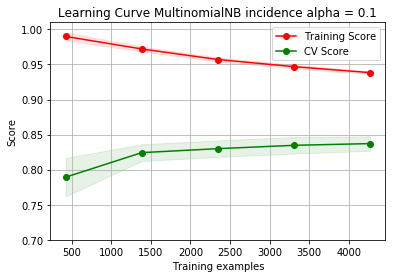

In [140]:
from sklearn.model_selection import ShuffleSplit
title = "Learning Curve MultinomialNB incidence alpha = 0.1"
cv = ShuffleSplit(n_splits=100,test_size=0.2, random_state=0)
estimator = MultinomialNB(alpha=0.1)
plot_learning_curve(estimator,title,mess_tfidf,incidence,ylim=(0.7,1.01),cv=cv,n_jobs=4)
plt.show()

In [78]:
pipeline.fit(title_tr,incidence_tr)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x00000208AC4CAAE8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...e_idf=True)), ('classifier', ComplementNB(alpha=0.1, class_prior=None, fit_prior=True, norm=False))])

In [84]:
pipeline.fit(title_tr,germline_tr)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x00000208AC4CAAE8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...e_idf=True)), ('classifier', ComplementNB(alpha=0.1, class_prior=None, fit_prior=True, norm=False))])

In [90]:
pipeline.fit(title_tr,somatic_tr)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x00000208AC4CAAE8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...e_idf=True)), ('classifier', ComplementNB(alpha=0.1, class_prior=None, fit_prior=True, norm=False))])

In [91]:
#penetrance_pre = pipeline.predict(title_te)
#incidence_pre = pipeline.predict(title_te)
#germline_pre = pipeline.predict(title_te)
somatic_pre = pipeline.predict(title_te)

In [32]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(somatic_te,somatic_pre))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       403
         1.0       0.74      0.75      0.75       131

   micro avg       0.87      0.87      0.87       534
   macro avg       0.83      0.83      0.83       534
weighted avg       0.87      0.87      0.87       534



In [73]:
print(classification_report(penetrance_te,penetrance_pre))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       448
         1.0       0.63      0.62      0.62        86

   micro avg       0.88      0.88      0.88       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.88      0.88      0.88       534



In [86]:
print(classification_report(germline_te,germline_pre))

              precision    recall  f1-score   support

         0.0       0.74      0.56      0.64       110
         1.0       0.89      0.95      0.92       424

   micro avg       0.87      0.87      0.87       534
   macro avg       0.82      0.76      0.78       534
weighted avg       0.86      0.87      0.86       534



In [80]:
print(classification_report(incidence_te,incidence_pre))

              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       305
         1.0       0.82      0.90      0.86       229

   micro avg       0.87      0.87      0.87       534
   macro avg       0.87      0.88      0.87       534
weighted avg       0.88      0.87      0.88       534



In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [97]:
##################SVM#########################

In [100]:
from sklearn.svm import SVC

In [101]:
pipelinesvm = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [104]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [113]:
#run from here everytime as pipeline needs to be reset
pipelinesvm = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid)
])

In [114]:
#pipelinesvm.fit(title_tr,penetrance_tr)

In [120]:
#pipelinesvm.fit(title_tr,incidence_tr)

In [121]:
pipelinesvm.fit(title_tr,germline_tr)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8169893816364772, total=  24.3s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, score=0.817385866166354, total=  17.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, score=0.817385866166354, total=  17.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8169893816364772, total=  22.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.817385866166354, total=  16.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ........ C=0.1, gamma=0.1, score=0.817385866166354, total=  23.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.8169893816364772, total=  19.8s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.817385866166354, total=  23.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.817385866166354, total=  19.4s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 28.9min finished


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000001468ACE1268>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3))])

In [89]:
pipelinesvm.fit(title_tr,somatic_tr)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.7651467832604623, total=   8.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.0s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.7654784240150094, total=   8.8s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.5s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.7654784240150094, total=   8.5s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7651467832604623, total=   7.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7654784240150094, total=   7.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7654784240150094, total=   7.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7651467832604623, total=   6.7s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7654784240150094, total=   6.6s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7654784240150094, total=   6.7s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 10.6min finished


Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000002146ADEA0D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3))])

In [122]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [91]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

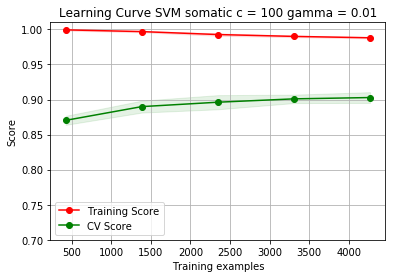

In [124]:
from sklearn.model_selection import ShuffleSplit
title = "Learning Curve SVM somatic c = 100 gamma = 0.01"
cv = ShuffleSplit(n_splits=10,test_size=0.2, random_state=0)
estimator = SVC(C=100, gamma=0.01)
plot_learning_curve(estimator,title,mess_tfidf,somatic,ylim=(0.7,1.01),cv=cv,n_jobs=4)
plt.show()

In [92]:
pipelinesvm = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid.best_estimator_)
])

In [63]:
#pipelinesvm.fit(title_tr,penetrance_tr)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000002146ADEA0D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [77]:
#pipelinesvm.fit(title_tr,incidence_tr)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000002146ADEA0D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [86]:
#pipelinesvm.fit(title_tr,germline_tr)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000002146ADEA0D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [93]:
pipelinesvm.fit(title_tr,somatic_tr)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x000002146ADEA0D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
penetrance_predict = pipelinesvm.predict(title_te)
print(confusion_matrix(penetrance_te,penetrance_predict))
print('\n')
print(classification_report(penetrance_te,penetrance_predict))

[[427  17]
 [ 31  59]]


              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       444
         1.0       0.78      0.66      0.71        90

   micro avg       0.91      0.91      0.91       534
   macro avg       0.85      0.81      0.83       534
weighted avg       0.91      0.91      0.91       534



In [78]:
incidence_predict = pipelinesvm.predict(title_te)
print(confusion_matrix(incidence_te,incidence_predict))
print('\n')
print(classification_report(incidence_te,incidence_predict))

[[287  34]
 [ 17 196]]


              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92       321
         1.0       0.85      0.92      0.88       213

   micro avg       0.90      0.90      0.90       534
   macro avg       0.90      0.91      0.90       534
weighted avg       0.91      0.90      0.91       534



In [87]:
germline_predict = pipelinesvm.predict(title_te)
print(confusion_matrix(germline_te,germline_predict))
print('\n')
print(classification_report(germline_te,germline_predict))

[[ 51  47]
 [ 12 424]]


              precision    recall  f1-score   support

         0.0       0.81      0.52      0.63        98
         1.0       0.90      0.97      0.93       436

   micro avg       0.89      0.89      0.89       534
   macro avg       0.85      0.75      0.78       534
weighted avg       0.88      0.89      0.88       534



In [94]:
somatic_predict = pipelinesvm.predict(title_te)
print(confusion_matrix(somatic_te,somatic_predict))
print('\n')
print(classification_report(somatic_te,somatic_predict))

[[393  17]
 [ 37  87]]


              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       410
         1.0       0.84      0.70      0.76       124

   micro avg       0.90      0.90      0.90       534
   macro avg       0.88      0.83      0.85       534
weighted avg       0.90      0.90      0.90       534



In [95]:
###############LR############################

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report,confusion_matrix

In [131]:
param = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid = GridSearchCV(LogisticRegression(),param,verbose=3)

In [132]:
#runfrom here always
pipelineLR = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid)
])

In [137]:
#pipelineLR.fit(title_tr,penetrance_tr)
#pipelineLR.fit(title_tr,incidence_tr)
pipelineLR.fit(title_tr,germline_tr)
#pipelineLR.fit(title_tr,somatic_tr)
grid.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] solver=newton-cg ................................................
[CV] ....... solver=newton-cg, score=0.8763272954403498, total=   0.7s
[CV] solver=newton-cg ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ....... solver=newton-cg, score=0.8611632270168855, total=   0.6s
[CV] solver=newton-cg ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV] ....... solver=newton-cg, score=0.8736710444027517, total=   0.7s
[CV] solver=lbfgs ....................................................
[CV] ........... solver=lbfgs, score=0.8763272954403498, total=   0.7s
[CV] solver=lbfgs ....................................................
[CV] ........... solver=lbfgs, score=0.8611632270168855, total=   0.8s
[CV] solver=lbfgs ....................................................
[CV] ........... solver=lbfgs, score=0.8736710444027517, total=   0.8s
[CV] solver=liblinear ................................................
[CV] ....... solver=liblinear, score=0.8763272954403498, total=   0.2s
[CV] solver=liblinear ................................................
[CV] ....... solver=liblinear, score=0.8611632270168855, total=   0.2s
[CV] solver=liblinear ................................................
[CV] ....... solver=liblinear, score=0.8736710444027517, total=   0.2s
[CV] solver=sag ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    9.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

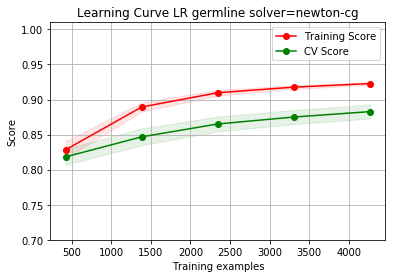

In [138]:
from sklearn.model_selection import ShuffleSplit
title = "Learning Curve LR germline solver=newton-cg"
cv = ShuffleSplit(n_splits=100,test_size=0.2, random_state=0)
estimator = LogisticRegression(solver='newton-cg')
plot_learning_curve(estimator,title,mess_tfidf,germline,ylim=(0.7,1.01),cv=cv,n_jobs=4)
plt.show()

In [125]:
pipelineLR = Pipeline([
    ('bow',CountVectorizer(analyzer=text_proc)),
    ('tfidf',TfidfTransformer()),
    ('classifier',grid.best_estimator_)
])
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [127]:
#pipelineLR.fit(title_tr,penetrance_tr)
#pipelineLR.fit(title_tr,incidence_tr)
#pipelineLR.fit(title_tr,germline_tr)
pipelineLR.fit(title_tr,somatic_tr)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_proc at 0x00000208AC4CAAE8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=N...penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False))])

In [113]:
penetrance_predict = pipelineLR.predict(title_te)
print(confusion_matrix(penetrance_te,penetrance_predict))
print('\n')
print(classification_report(penetrance_te,penetrance_predict))

[[435  13]
 [ 42  44]]


              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       448
         1.0       0.77      0.51      0.62        86

   micro avg       0.90      0.90      0.90       534
   macro avg       0.84      0.74      0.78       534
weighted avg       0.89      0.90      0.89       534



In [118]:
incidence_predict = pipelineLR.predict(title_te)
print(confusion_matrix(incidence_te,incidence_predict))
print('\n')
print(classification_report(incidence_te,incidence_predict))

[[280  25]
 [ 21 208]]


              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       305
         1.0       0.89      0.91      0.90       229

   micro avg       0.91      0.91      0.91       534
   macro avg       0.91      0.91      0.91       534
weighted avg       0.91      0.91      0.91       534



In [123]:
germline_predict = pipelineLR.predict(title_te)
print(confusion_matrix(germline_te,germline_predict))
print('\n')
print(classification_report(germline_te,germline_predict))

[[ 43  67]
 [  4 420]]


              precision    recall  f1-score   support

         0.0       0.91      0.39      0.55       110
         1.0       0.86      0.99      0.92       424

   micro avg       0.87      0.87      0.87       534
   macro avg       0.89      0.69      0.73       534
weighted avg       0.87      0.87      0.84       534



In [128]:
somatic_predict = pipelineLR.predict(title_te)
print(confusion_matrix(somatic_te,somatic_predict))
print('\n')
print(classification_report(somatic_te,somatic_predict))

[[389  14]
 [ 44  87]]


              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       403
         1.0       0.86      0.66      0.75       131

   micro avg       0.89      0.89      0.89       534
   macro avg       0.88      0.81      0.84       534
weighted avg       0.89      0.89      0.89       534



In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv =None, n_jobs=None, train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X,y,cv=cv, n_jobs=n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean-train_scores_std,train_scores_mean+train_scores_std,alpha=0.1,color='r')
    plt.fill_between(train_sizes, test_scores_mean-test_scores_std,test_scores_mean+test_scores_std,alpha=0.1,color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-',color='r',label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-',color='g',label="CV Score")
    
    plt.legend(loc="best")
    return plt